In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plot
import rigol_plot as rigol
import numpy as np

In [5]:
usb = rigol.list_device()
print(usb)
if len(usb)<1:
    adr = u'TCPIP::10.5.78.184::INSTR'
else:
    adr = usb[1]
print(adr)

['USB0::0x0400::0x09C4::DSA1B170700030::INSTR', 'USB0::0x1AB1::0x04CE::DS1ZA170300751::INSTR']
USB0::0x1AB1::0x04CE::DS1ZA170300751::INSTR


timescale 0.001 	 timeoffset 0.000
y_inc = 0.00 	 y_ref = 127.00 	 y_ori = 0.00
CH1(AC): data size: 1200; sampl.rate: 2.500000e+08; Mem.depth: AUTO
y_inc = 0.02 	 y_ref = 127.00 	 y_ori = 0.00
CH2(DC): data size: 1200; sampl.rate: 2.500000e+08; Mem.depth: AUTO


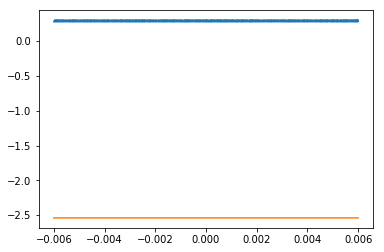

In [6]:
time, data, dt = rigol.read(adr, [1,2]);
data[0].size
time.size
time
plot.plot(time, data[0], time, data[1])
#plot.show()

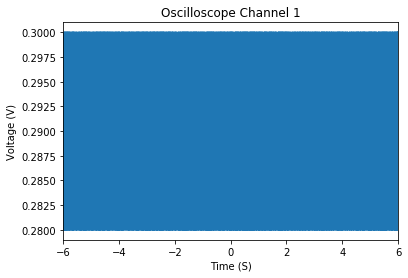

In [8]:
# See if we should use a different time axis
if (time[-1] < 1e-3):
    time = time * 1e6
    tUnit = "uS"
elif (time[-1] < 1):
    time = time * 1e3
    tUnit = "mS"
else:
    tUnit = "S"

# Plot the data
plot.plot(time, data[0])
plot.title("Oscilloscope Channel 1")
plot.ylabel("Voltage (V)")
plot.xlabel("Time (" + tUnit + ")")
plot.xlim(time[0], time[-1])
plot.show()

In [91]:
import visa

rm = visa.ResourceManager('@ni')
scope = rm.open_resource(u'USB0::0x1AB1::0x04CE::DS1ZA170300751::INSTR')

print(scope.query_delay)
print(scope.query("*IDN?"))

ret = scope.write(':RUN')
print(ret[1]==0)

#ret = scope.write('')
#scope.query?

0.0
RIGOL TECHNOLOGIES,DS1054Z,DS1ZA170300751,00.04.02.SP4

True


In [133]:
import time as t
import numpy

y_inc = scope.query(':WAVeform:YINCrement?')
y_ref = scope.query(':WAVeform:YREFerence?')
y_ori = scope.query(':WAVeform:YORigin?')
scope.write(':SINgle')
trigger = 'WAIT'
while trigger.find('STOP') < 0:
    trigger = scope.query(":TRIGger:STATus?")
    t.sleep(0.1)
    
scope.write(':WAV:DATA? CHAN2')
instuff = scope.read_raw()
instuff = instuff[11:-1]
indata = numpy.frombuffer(instuff, 'B').astype(float)
print(y_inc, y_ref, y_ori)

scope.write(':RUN')


4.000000e-05
 127
 0



(6, <StatusCode.success: 0>)

[1]